<a href="https://colab.research.google.com/github/Erickype/CiscoAnualInternetReport/blob/master/CiscoAnualReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalation

In [1]:
! sudo apt-get update
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! wget http://mirrors.ctan.org/macros/latex/...
! unzip type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash
!apt install cm-super

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [517 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,016 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,264 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,144 kB]
Hit:13 ht

In [2]:
!pip install PyLaTeX
!pip install pylatex[matrices]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyLaTeX: filename=PyLaTeX-1.4.1-py3-none-any.whl size=42791 sha256=6f763d1040cf51773e535bd148f6b0343738819c1b3a69071ee2decac2069d4f
  Stored in directory: /root/.cache/pip/wheels/7d/6d/a1/716565cec073a7ccebc1eb9a7c061658a75d5559c16f0ee875
Successfully built PyLaTeX


## Sections

In [177]:
import matplotlib
from pylatex import Document, Section, Subsection, Command, Figure, SubFigure
from pylatex.utils import italic, NoEscape

matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import os


In [178]:
class Fact:
  title = ""
  text = ""
  figureName = ""
  figurePath = ""
  growthName = ""
  growth = ""

def GetFigurePath(name):
   return os.path.join(os.path.dirname("./"), name)

### Resumen

In [179]:
resumen = Fact()
resumen.text = "La empresa Cisco presenta el reporte anual de internet que muestra las principales tendencias en cuanto al uso y alcance. Además, se muestran datos relacionados con el uso de dispositivos móviles y tecnologías emergentes y ya establecidas como las redes móviles 4G y 5G."

### Internet adopcion

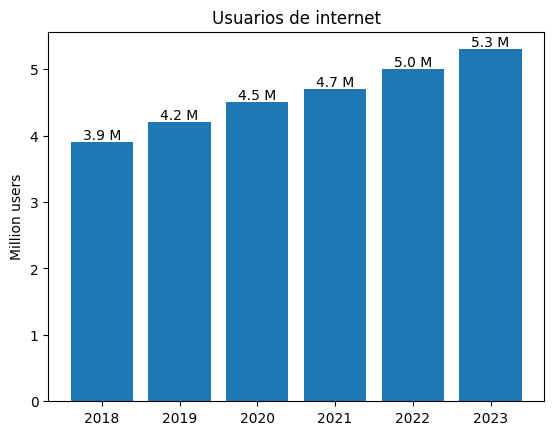

In [180]:
intAdoption = Fact()
intAdoption.title = "Adopción global de internet"
intAdoption.text = "Se evidencia un constante crecimiento en el número de usuarios en la figura 1, en la figura 2 se muestran los porcentajes de crecimiento evidenciando un declive en el crecimiento entre 2020 y 2021 a pesar de la adopción del enfoque remoto durante la pandemia por COVID -19."
intAdoption.figureName = "intAdoption.png"
intAdoption.growthName = "internetCrecimiento.png"

## plot chart
years = ["2018", "2019", "2020", "2021", "2022", "2023"]
users = [3.9, 4.2, 4.5, 4.7, 5.0, 5.3]  # miles de millones

figure, ax = plt.subplots()

container = ax.bar(years, users)
ax.bar_label(container, fmt=lambda x: f'{x} M')

ax.set_ylabel('Million users')
ax.set_title('Usuarios de internet')

plt.show()

figure.savefig(intAdoption.figureName)
intAdoption.figurePath = GetFigurePath(intAdoption.figureName)

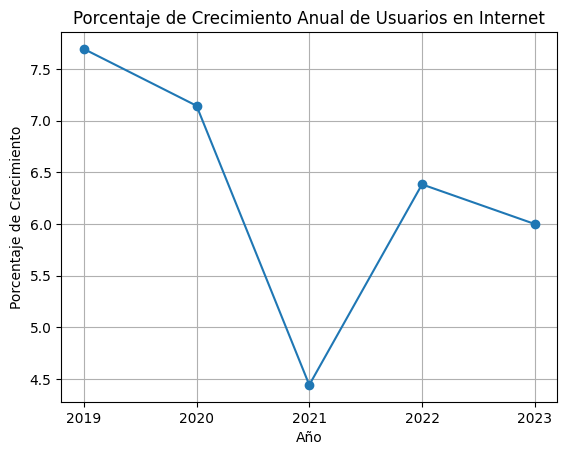

In [181]:
growth_rates = [((users[i] - users[i - 1]) / users[i - 1]) * 100 for i in range(1, len(users))]

plt.clf()
# Crear el gráfico
plt.plot(years[1:], growth_rates, marker='o', linestyle='-')
plt.title('Porcentaje de Crecimiento Anual de Usuarios en Internet')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Crecimiento')
plt.grid(True)

# Guardar la figura
plt.savefig(intAdoption.growthName)

intAdoption.growthPath = GetFigurePath(intAdoption.growthName)

# Mostrar el gráfico
plt.show()

## Document fill

In [185]:
def fill_document(doc, fname, width, *args, **kwargs):
    doc.append(resumen.text)

    ## Internet adoption
    with doc.create(Section(intAdoption.title)):
      doc.append(intAdoption.text)
      with doc.create(Figure(position='h!')) as intAdoptionFig:
            with doc.create(SubFigure(
                    position='b',
                    width=NoEscape(r'0.45\linewidth'))) as figure:

                figure.add_image(intAdoption.figurePath,
                                      width=NoEscape(r'\linewidth'))
                figure.add_caption('Usuarios de internet')
            with doc.create(SubFigure(
                    position='b',
                    width=NoEscape(r'0.45\linewidth'))) as growth:

                growth.add_image(intAdoption.growthPath,
                                       width=NoEscape(r'\linewidth'))
                growth.add_caption('Porcentaje crecimiento')
            intAdoptionFig.add_caption("Crecimiento de usuarios en internet")


In [186]:
if __name__ == '__main__':
    # Document with `\maketitle` command activated
    doc = Document()

    doc.preamble.append(Command('title', 'Análisis de reporte anual de internet de Cisco'))
    doc.preamble.append(Command('author', 'Erick Carrasco'))
    doc.preamble.append(Command('date', NoEscape(r'\today')))
    doc.append(NoEscape(r'\maketitle'))

    fill_document(doc,'matplotlib_ex-dpi', r'1\textwidth', dpi=300)

    doc.generate_pdf('report', clean_tex=False)

In [187]:
from google.colab import files
files.download("report.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>